In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as st

## Regression i Python

I paketet statsmodels.api finns funktionen OLS (Ordinary Linear Regression) som används för att göra linjär regression.

Vi läser in data som en Pandas-dataframe. Datafilen finns på kurssidan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
data = pd.read_csv("/content/drive/MyDrive/Phd/Lektionsansvar/Matematisk statistik KF/Python files/energi-forbrukning.csv")
df = data[['gatu- och vägbelysning','stamnätsförluster','fritidsbostäder']]

In [20]:
df.head()

,gatu- och vägbelysning,stamnätsförluster,fritidsbostäder
0,637,2898,2320
1,746,2684,2998
2,860,2420,3263
3,686,2522,2749
4,686,3476,3043


    Först skapas ett modelobjekt, här är stamnätsförluster beroende variabel (y)
    och vi använder endast fritidsbostäder som förklarande variabel.
Vi kommer alltså att skatta en regressionlinje på formen $y=\beta x$.

In [21]:
model1 = st.OLS(df['stamnätsförluster'],df['fritidsbostäder'])

Om vi vill skatta en regressionslinje på formen $y=\beta x+\alpha$ behöver funktionensanropets andra argument inkludera en variabel som är konstant 1. Statsmodels har en funktion add_constant för att lägga till en sådan variabel i en DataFrame.

In [24]:
df = st.add_constant(df) # Observera att vi skriver över df

In [25]:
df.head()

,const,gatu- och vägbelysning,stamnätsförluster,fritidsbostäder
0,1.0,637,2898,2320
1,1.0,746,2684,2998
2,1.0,860,2420,3263
3,1.0,686,2522,2749
4,1.0,686,3476,3043


Vi kan nu göra en ny modell med OLS-funktionen:

In [26]:
model2 = st.OLS(df['stamnätsförluster'],df[["const","fritidsbostäder"]])

För att bestämma punktskattningar för respektive parameter använder vi funktionen **fit**:

In [27]:
result1 = model1.fit()
result2 = model2.fit()

In [28]:
print(result1.summary())


                                 OLS Regression Results                                
Dep. Variable:      stamnätsförluster   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              556.7
Date:                Sun, 24 Mar 2024   Prob (F-statistic):                    4.68e-12
Time:                        16:36:57   Log-Likelihood:                         -106.36
No. Observations:                  14   AIC:                                      214.7
Df Residuals:                      13   BIC:                                      215.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:      stamnätsförluster   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.6377
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.440
Time:                        16:31:21   Log-Likelihood:                -105.69
No. Observations:                  14   AIC:                             215.4
Df Residuals:                      12   BIC:                             216.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1828.7902   1667.129     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Vi har nu 2 modeller, vi utläser punktskattningar av parametrarna och erhåller följande anpassade linjer:

### Model 1
$$y=1.0597x$$

### Model 2
$$ y= 0.4472x + 1828.7902 $$

Konfidensintervall av 95%-ig konfidensgraf kan utläsas ur summary output för våra punktskattningar $\alpha$ och $\beta$. Intervall av andra konfidensgrader kan vi finna med hjälp av de skattade standardavvikelserna, och formler vi lärt oss i kursen.

##OBS!!
Notera att förklaringsgraden R^2 är jättehög i den första modellen (0,977), men mycket mindre i modellen med intercept $\alpha$ inkluderad. Detta skall vi inte tolka som att den första modellen är mycket bättre i detta fall, då förklaringsgraden blir något annat i en modell utan intercept, och vi kan inte jämföra dem.

Det gäller att förklaringsgraden aldrig blir mindre av att inkludera fler förklarande variabler!

## Visualisera regressionsmodeller

I två dimensioner kan vi enkelt visualisera vår skattade regressionsmodell. Det blir dock svårare i högre dimensioner.

(2000.0, 3500.0)

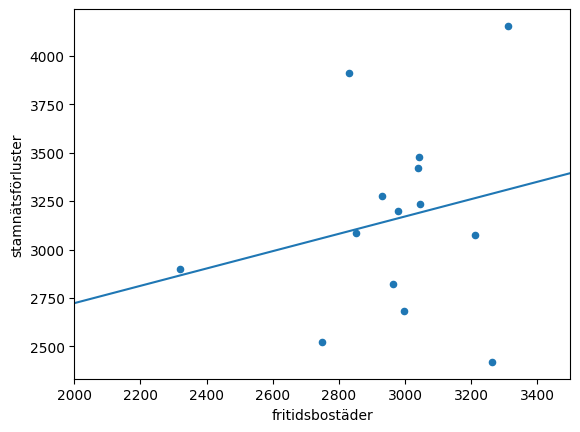

In [31]:
k = model2.fit().params

xx = np.arange(2000, 3500)
ax = df.plot(x='fritidsbostäder', y='stamnätsförluster', kind="scatter")

ax.plot(xx, k.const + k.fritidsbostäder*xx)
ax.set_xlim([2000, 3500])

## Multipel linjär regression    
    Om vi vill ha fler förklarande variabler gör vi på samma vis som när vi lade till en konstant:

In [14]:
model3 = st.OLS(df.stamnätsförluster,df[['gatu- och vägbelysning','const','fritidsbostäder']])

In [15]:
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:      stamnätsförluster   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     17.64
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           0.000370
Time:                        16:34:19   Log-Likelihood:                -95.993
No. Observations:                  14   AIC:                             198.0
Df Residuals:                      11   BIC:                             199.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
gatu- och vägbelysning    -3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
